# Assignment 2  <font color="blue"> (15 points) </font>
 
***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [ ]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://faculty.marshall.usc.edu/gareth-james/ISL/data.html> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
9. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

Part A - 1 use Pandas Read CSV method to load the credit dataset, then dtypes and desbribe to get a sense of the data and possible issues to correct.

In [ ]:
# Part A - 1
# Load Credit.csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

credit = pd.read_csv("Credit.csv")

In [ ]:
# show first 5 rows
credit.head(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
# drop Unnamed: 0 column as it is not part of the dataset
credit2 = credit.drop(["Unnamed: 0"],axis=1).copy()


In [ ]:
# use dtypes to verify is any are not proper types
credit2.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [ ]:
# use describe method to see if any information looks off or missing
credit2.describe(include="all")

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,No,Yes,Caucasian,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000


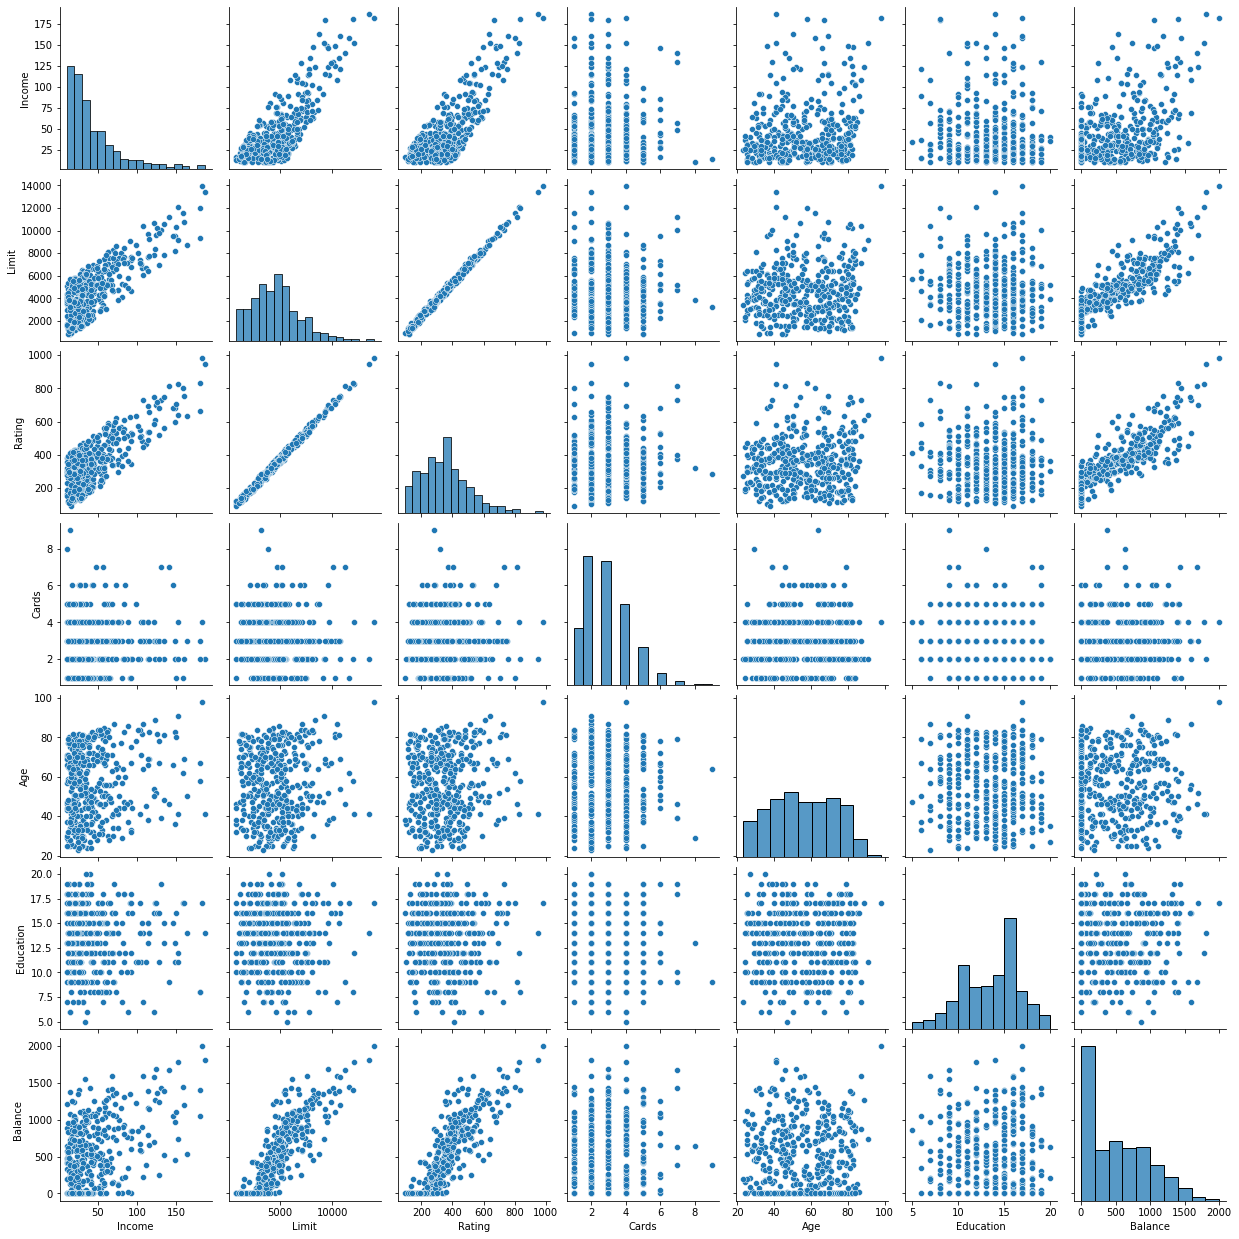

In [ ]:
pairplot = sns.pairplot(credit2)
plt.show()

Using the Seaborn pairplot, there are some clear dependencies such as Balance with Limit, Rating or Income. Furthermore, Limit and Rating have high positive correlation together, as do both of them with income, but less so. Furthermore, the correlation table above displays the similar associations mentions before.

Part A - 2 : to keep Income, Limit, Rating, Cards, Age, Education, and Balance, we can either only choose the columns to keep or drop the ones we dont.

In [ ]:
# only keep columns required in a new variable credit3
credit3 = credit2[["Income","Limit","Rating","Cards","Age","Education","Balance"]].copy()
credit3.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [ ]:
#print dimensions
credit3.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Balance        int64
dtype: object

Part A - 3 : To add a column based off the balance, we will need to use numpy.where method to determine if every row is above 1500 or below.

In [ ]:
# adding column Balance_1500
import numpy as np
credit3["Balance_1500"] = np.where(credit3["Balance"] > 1500,1,0)
credit3.head(5)

,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
0,14.891,3606,283,2,34,11,333,0
1,106.025,6645,483,3,82,15,903,0
2,104.593,7075,514,4,71,11,580,0
3,148.924,9504,681,3,36,11,964,0
4,55.882,4897,357,2,68,16,331,0


Part A - 4 : for this part we will use X for independent variables; Income, Limit, Rating, Cards, Age, Education and y for target variable; Balance_1500 and proceed with the 3 classification madels.

In [ ]:
# split credit3 into data and target dataframes X & y respectively.
X = credit3[["Income", "Limit", "Rating", "Cards", "Age", "Education"]].copy()
y = credit3[["Balance_1500"]].copy()


In [ ]:
# Split into train and test data for validation purposes later on
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=credit3["Balance_1500"])

In [ ]:
# change target dataframes into series for modeling
y_train2 = y_train.squeeze()
y_test2 = y_test.squeeze()

In [ ]:
# Set up logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
lr.fit(X_train,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Set up LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train2)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# set up QDA model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train2)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Part A - 5 : we will create an array of X_predict with the values mentioned through all models and use the predict_proba method to identify the probability of Balance_1500 or not

Income	Limit	Rating	Cards	Age	Education </br>
63 8100	600	4	30	13</br>
186	13414	950	2	41	13


In [ ]:
# setup array to predict with
X_predict = np.array([63,8100,600,4,30,13,186,13414,950,2,41,13]).reshape(2,6)
X_predict

array([[   63,  8100,   600,     4,    30,    13],
       [  186, 13414,   950,     2,    41,    13]])

In [ ]:
# run in the models with X_pred
lr_predict = lr.predict_proba(X_predict)
lda_predict = lda.predict_proba(X_predict)
qda_predict = qda.predict_proba(X_predict)

print("Logistic Regression Model : \n{}".format(lr_predict))
print("LDA Model : \n{}".format(lda_predict))
print("QDA Model : \n{}".format(qda_predict))
print("Logistic Regression Model Prediction for Balance_1500: {}".format(lr.predict(X_predict)))
print("LDA Model Prediction for Balance_1500: {}".format(lda.predict(X_predict)))
print("QDA Model Prediction for Balance_1500: {}".format(qda.predict(X_predict)))

Logistic Regression Model : 
[[0.99103833 0.00896167]
 [0.04968624 0.95031376]]
LDA Model : 
[[0.97170402 0.02829598]
 [0.00916942 0.99083058]]
QDA Model : 
[[1.00000000e+000 6.57600224e-113]
 [7.78397154e-005 9.99922160e-001]]
Logistic Regression Model Prediction for Balance_1500: [0 1]
LDA Model Prediction for Balance_1500: [0 1]
QDA Model Prediction for Balance_1500: [0 1]


All 3 models were consistent in their predictions for the 2 records. LDA & QDA were more complete in their probabilities of the second record at 99% while Logistic Regression gave 95% but that is still sufficient to make a decision. Given the above probabilities and predictions any of the three models would work sufficiently well.

Part A - 5 : we will need to use the test records reserved for this section. We will need to print the confusion matrix, the accuracy score and the AUC for all three models and comment

In [ ]:
# Logistic Regression metrics, Confusion Matrix, Accuracy Score & AUC Score.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score, plot_roc_curve
y_predict_lr = lr.predict(X_test)
print("LR Predictions for y_test2: \n",y_predict_lr)
conf_matrix_lr = confusion_matrix(y_test2, y_predict_lr)
AUC_score_lr = roc_auc_score(y_test2,y_predict_lr)
accuracy_lr = accuracy_score(y_test2,y_predict_lr)
print("Confusion Matrix:")
conf_matrix_lr
print('\nAccuracy Score:')
print(accuracy_lr)
print("AUC Score:")
print(AUC_score_lr)

LR Predictions for y_test2: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Confusion Matrix:


array([[77,  1],
       [ 2,  0]])


Accuracy Score:
0.9625
AUC Score:
0.4935897435897436


In [ ]:
# LDA metrics, Confusion Matrix, Accuracy Score & AUC Score.
y_predict_lda = lda.predict(X_test)
print("LDA Predictions for y_test2: \n",y_predict_lda)
conf_matrix_lda = confusion_matrix(y_test2, y_predict_lda)
AUC_score_lda = roc_auc_score(y_test2,y_predict_lda)
accuracy_lda = accuracy_score(y_test2,y_predict_lda)
print("Confusion Matrix:")
conf_matrix_lda
print('\nAccuracy Score:')
print(accuracy_lda)
print("AUC Score:")
print(AUC_score_lda)

LDA Predictions for y_test2: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Confusion Matrix:


array([[77,  1],
       [ 2,  0]])


Accuracy Score:
0.9625
AUC Score:
0.4935897435897436


In [ ]:
# QDA metrics, Confusion Matrix, Accuracy Score & AUC Score.
y_predict_qda = qda.predict(X_test)
print("QDA Predictions for y_test2: \n",y_predict_qda)
conf_matrix_qda = confusion_matrix(y_test2, y_predict_qda)
AUC_score_qda = roc_auc_score(y_test2,y_predict_qda)
accuracy_qda = accuracy_score(y_test2,y_predict_qda)
print("Confusion Matrix:")
conf_matrix_qda
print('\nAccuracy Score:')
print(accuracy_qda)
print("AUC Score:")
print(AUC_score_qda)

QDA Predictions for y_test2: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Confusion Matrix:


array([[78,  0],
       [ 2,  0]])


Accuracy Score:
0.975
AUC Score:
0.5


This dataset is heavily on the Balance_1500 == 0 side which heavily skews the results. Furthermore, there are various features which are heavily correlated with eachother. All three models have high accuracy scores but this is explained by simply selecting Balance_1500 == 0 for all guesses. This seems to be the case for QDA above with an AUC score of 0.5 all predictions are 0. LDA & LR guessed a few records as Balance_1500 == 1 which is why their AUC score is less than 0.5. To improve the models PCA components could be used to select the highest variance, a difference decision boundary decision to add more weight to the Balance_1500 == 1 side, stratifying splitting the data so equal casses show up in test and train datasets, and possibly more.

## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


Part B - 1 : to drop all records in train and test datasets, we will need to load these CSV files and look through them to pick the best method to do so.

In [ ]:
# load both ziptest.csv & ziptrain.csv, remove last column of ziptrain as its all NaN
ziptrain = pd.read_csv("ziptrain.csv", sep=" ", header=None)
ziptest = pd.read_csv("ziptest.csv", sep=" ", header=None)
ziptrain = ziptrain.drop(ziptrain.columns[-1],axis=1)

In [ ]:
# convert first column to int32 for processing
ziptrain0 = ziptrain[0].astype("int32")
ziptrain[0] = ziptrain0
ziptest0 = ziptest[0].astype("int32")
ziptest[0] = ziptest0

In [ ]:
# keep targets 2 and 7 from column[0] and create new dataframe binar_train & binar_test
ziptrain2 = ziptrain[ziptrain[0]==2]
ziptrain7 = ziptrain[ziptrain[0]==7]
binar_train = pd.concat([ziptrain2,ziptrain7])

ziptest2 = ziptest[ziptest[0]==2]
ziptest7 = ziptest[ziptest[0]==7]
binar_test = pd.concat([ziptest2,ziptest7])

binar_train.shape
binar_test.shape

(1376, 257)

(345, 257)

Part B - 2 : Project binar_train on 2 principle components and build a scatterplot out of the results.

In [ ]:
# create model and train using the binar_train data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = binar_train.drop(binar_train.columns[0],axis=1)
y = binar_train[0]
pca.fit(X)
Z = pca.transform(X)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

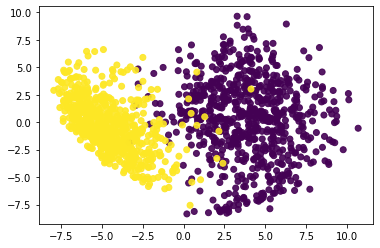

In [ ]:
# Build visual scatterplot of data with clear markers
import matplotlib.pyplot as plt
plt.scatter(Z[:,0], Z[:,1], c= y, alpha=0.9);

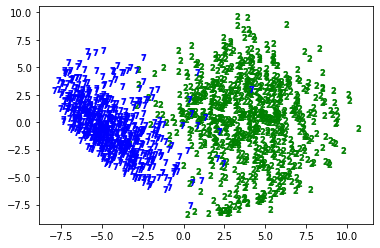

In [ ]:
# more visual markers as 2's and 7's
plt.scatter(Z[y==2,0], Z[y==2,1], marker='$2$', 
            color='green', alpha = 0.9);

plt.scatter(Z[y==7,0], Z[y==7,1], marker='$7$', 
            color='blue', alpha = 0.9);

Based on the above scatterplots, the PCS transformation with 2 components would work well. The is a bit of overlap so there would be some mistakes certainly but the majority of the true values would be correctly separated in their own classes.

Part B - 3 : Build Logistic Regression of the new transformed space Z

In [ ]:
# instantiate and train model with the transformed data Z, y
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
lr.fit(Z,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Part B - 4 : To evaluate our model using binar_test we will separate the response variables from the features, transform the data using our PCA model from question 2, and run the data through our Logistic Regression model in question 3. We will then evaluate our model using accuracy and F-Measure. Because both classes have close distributions and quantity an F1-Score should be appropriate as both should be weighted equally. We will use Macro averaging as labels are balanced.

In [ ]:
# separate binar_test into X_test & y_test
X_test = binar_test.drop(binar_test.columns[0],axis=1)
y_test = binar_test[0]
X_test.shape
y_test.shape

(345, 256)

(345,)

In [ ]:
# transform X_test into Z_test in the PCA model
Z_test = pca.transform(X_test)
y_pred = lr.predict(Z_test)

In [ ]:
# Accuracy and F1-Score
from sklearn.metrics import accuracy_score, f1_score
acc_lr = accuracy_score(y_test, y_pred)
f1score_lr = f1_score(y_test,y_pred,average="macro")
print("Accuracy Score : {}".format(acc_lr))
print("F 1 Score : {}".format(f1score_lr))


Accuracy Score : 0.9652173913043478
F 1 Score : 0.9643766779100984


Part B - 5 : Build a confusion matrix comparing y_test & y_pred from our Logistic Regression in the previous question 4

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat_lr = confusion_matrix(y_test,y_pred)
print(conf_mat_lr)

[[193   5]
 [  7 140]]


Part B - 6 : We will need to gather our new X & y variables using the whole training & testing datasets and project using PCA with m = 2,3,4, & 5 components.

In [ ]:
# create our train and test features and response variables for model training and selection
y_train = ziptrain[0].copy()
X_train = ziptrain.drop(ziptrain.columns[0],axis=1)
y_test = ziptest[0].copy()
X_test = ziptest.drop(ziptest.columns[0],axis=1)

In [ ]:
# prepare our PCA component analysis
# PCA 2 components
from sklearn.decomposition import PCA
pca2 = PCA(n_components = 2)
pca2.fit(X_train)
Z2 = pca2.transform(X_train)
Z2.shape

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(7291, 2)

In [ ]:
# PCA 3 components
pca3 = PCA(n_components = 3)
pca3.fit(X_train)
Z3 = pca3.transform(X_train)
Z3.shape

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(7291, 3)

In [ ]:
# PCA 4 components
pca4 = PCA(n_components = 4)
pca4.fit(X_train)
Z4 = pca4.transform(X_train)
Z4.shape

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(7291, 4)

In [ ]:
# PCA 5 components
pca5 = PCA(n_components = 5)
pca5.fit(X_train)
Z5 = pca5.transform(X_train)
Z5.shape

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(7291, 5)

Part B - 7 : We will train a Linear Discriminant Analysis using 5-fold cross validation on our 5 components Z1-Z5 and y_train.

In [ ]:
# We train our models then use the cross_val_score to determine the averave accuracy score of our 
# model with a 5 fold cross validation.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
lda2 = LinearDiscriminantAnalysis()
lda2.fit(Z2,y_train)
cvscore2 = cross_val_score(lda2,Z2,y_train,cv=5,scoring='balanced_accuracy')
print("\nAccuracy 2 Components: %0.2f (+/- %0.2f)" % (cvscore2.mean(), cvscore2.std() * 2))
lda3 = LinearDiscriminantAnalysis()
lda3.fit(Z3,y_train)
cvscore3 = cross_val_score(lda3,Z3,y_train,cv=5,scoring='balanced_accuracy')
print("\nAccuracy 3 Components: %0.2f (+/- %0.2f)" % (cvscore3.mean(), cvscore3.std() * 2))
lda4 = LinearDiscriminantAnalysis()
lda4.fit(Z4,y_train)
cvscore4 = cross_val_score(lda4,Z4,y_train,cv=5,scoring='balanced_accuracy')
print("\nAccuracy 4 Components: %0.2f (+/- %0.2f)" % (cvscore4.mean(), cvscore4.std() * 2))
lda5 = LinearDiscriminantAnalysis()
lda5.fit(Z5,y_train)
cvscore5 = cross_val_score(lda5,Z5,y_train,cv=5,scoring='balanced_accuracy')
print("\nAccuracy 5 Components: %0.2f (+/- %0.2f)" % (cvscore5.mean(), cvscore5.std() * 2))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


Accuracy 2 Components: 0.48 (+/- 0.01)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


Accuracy 3 Components: 0.54 (+/- 0.02)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


Accuracy 4 Components: 0.67 (+/- 0.01)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


Accuracy 5 Components: 0.70 (+/- 0.02)


Part B - 5 : Based on the Cross Validation Accuracy in the previous question, the Model with 5 components had the highest accuracy. This does not mean that the model is best, as it could be overfit. But just basing this decision on the CV Accuracy Score would select the Model with 5 PCA components.

In [ ]:
Z5_test = pca5.transform(X_test)
y_predict5 = lda5.predict(Z5_test)
conf_mat5 = confusion_matrix(y_test,y_predict5)
conf_mat5
print("\nAccuracy Score for N=5 Components = {}".format(accuracy_score(y_test,y_predict5)))

array([[286,   0,  12,   4,   7,   7,  39,   0,   4,   0],
       [  0, 259,   0,   0,   1,   1,   2,   0,   0,   1],
       [  9,   8, 110,  15,  15,   8,  10,   0,  19,   4],
       [  3,   0,  10, 106,   0,  25,   0,   0,  22,   0],
       [  3,  12,  14,   0, 116,   0,   7,  20,   2,  26],
       [ 24,   0,  12,  25,   7,  76,   4,   0,   9,   3],
       [ 22,   2,   7,   0,   4,   1, 134,   0,   0,   0],
       [  0,   2,   4,   0,  14,   1,   0, 104,   1,  21],
       [  3,   5,  19,  17,   4,  12,   2,   1,  85,  18],
       [  0,  14,   1,   0,  19,   0,   0,  45,  10,  88]])


Accuracy Score for N=5 Components = 0.6796213253612357


In [ ]:
Z4_test = pca4.transform(X_test)
y_predict4 = lda4.predict(Z4_test)
conf_mat4 = confusion_matrix(y_test,y_predict4)
conf_mat4
print("\nAccuracy Score for N=4 Components = {}".format(accuracy_score(y_test,y_predict4)))

array([[286,   0,  19,   4,   4,   4,  38,   0,   4,   0],
       [  0, 257,   0,   0,   0,   0,   4,   0,   3,   0],
       [ 15,   9,  83,  18,  19,  17,  17,   1,  16,   3],
       [  5,   0,  10, 108,   0,  23,   0,   0,  20,   0],
       [  2,  12,  16,   0, 110,   0,   9,  19,   2,  30],
       [ 23,   0,  19,  24,   4,  70,   4,   0,  16,   0],
       [ 18,   2,  17,   0,   4,   1, 128,   0,   0,   0],
       [  0,   3,   4,   0,  12,   0,   0, 105,   1,  22],
       [  3,   5,  18,  17,   7,  16,   1,   1,  83,  15],
       [  0,  15,   0,   0,  17,   0,   0,  48,   6,  91]])


Accuracy Score for N=4 Components = 0.658196312904833


In [ ]:
Z3_test = pca3.transform(X_test)
y_predict3 = lda3.predict(Z3_test)
conf_mat3 = confusion_matrix(y_test,y_predict3)
conf_mat3
print("\nAccuracy Score for N=3 Components = {}".format(accuracy_score(y_test,y_predict3)))

array([[281,   0,  16,  10,   1,  13,  34,   0,   4,   0],
       [  0, 257,   0,   2,   0,   0,   4,   0,   1,   0],
       [ 18,  16,  81,  41,  13,  11,  14,   0,   3,   1],
       [ 20,   0,  27,  64,  14,  20,   1,   0,  17,   3],
       [  2,  14,  15,  16,  55,   4,   7,  27,  12,  48],
       [ 39,   0,  31,  29,   5,  21,  31,   0,   4,   0],
       [ 22,   2,  19,   0,   1,   4, 120,   0,   2,   0],
       [  0,   3,   3,   4,   9,   0,   0, 113,   0,  15],
       [  7,   2,  23,  38,  39,   5,   2,   1,  41,   8],
       [  0,  11,   0,   4,  28,   0,   0,  52,   5,  77]])


Accuracy Score for N=3 Components = 0.5530642750373692


In [ ]:
Z2_test = pca2.transform(X_test)
y_predict2 = lda2.predict(Z2_test)
conf_mat2 = confusion_matrix(y_test,y_predict2)
conf_mat2
print("\nAccuracy Score for N=2 Components = {}".format(accuracy_score(y_test,y_predict2)))

array([[296,   0,  11,  18,   1,  12,  21,   0,   0,   0],
       [  0, 257,   0,   2,   2,   0,   3,   0,   0,   0],
       [ 17,  11,  69,  44,  12,  10,  27,   0,   6,   2],
       [ 20,   0,  33,  68,  20,  15,   1,   1,   7,   1],
       [  2,  17,  11,  20,  60,   4,   7,  32,   5,  42],
       [ 37,   1,  29,  33,   7,  19,  33,   0,   1,   0],
       [ 23,   9,  14,   2,   1,   7, 114,   0,   0,   0],
       [  0,   2,   2,   4,   8,   0,   0, 100,   0,  31],
       [  8,   6,  32,  45,  54,   4,   1,   5,   6,   5],
       [  0,  10,   0,   7,  30,   0,   0,  81,   1,  48]])


Accuracy Score for N=2 Components = 0.5166915794718485


Based on the above analysis using the ziptest data transformed and compared, the PCA with 5 Components did in fact work best with the new results that were never seen.